# Análisis Histórico de TiempoCheck
Este notebook analiza los datos de navegación exportados desde TiempoCheck.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset exportado
df = pd.read_csv('../ml/dataset/dataset_usuario_1.csv')
df['tiempo_minutos'] = df['tiempo_minutos'] / 60
df.head()


,usuario_id,fecha,hora,dominio,tiempo_minutos,categoria
0,1,2025-07-28,11:58,chatgpt.com,0.333333,Productividad
1,1,2025-07-28,11:59,chatgpt.com,0.350000,Productividad
2,1,2025-07-28,11:59,chatgpt.com,0.066667,Productividad
3,1,2025-07-28,11:59,chatgpt.com,0.200000,Productividad
4,1,2025-07-28,12:00,chatgpt.com,0.183333,Productividad


## Distribución de tiempo por categoría

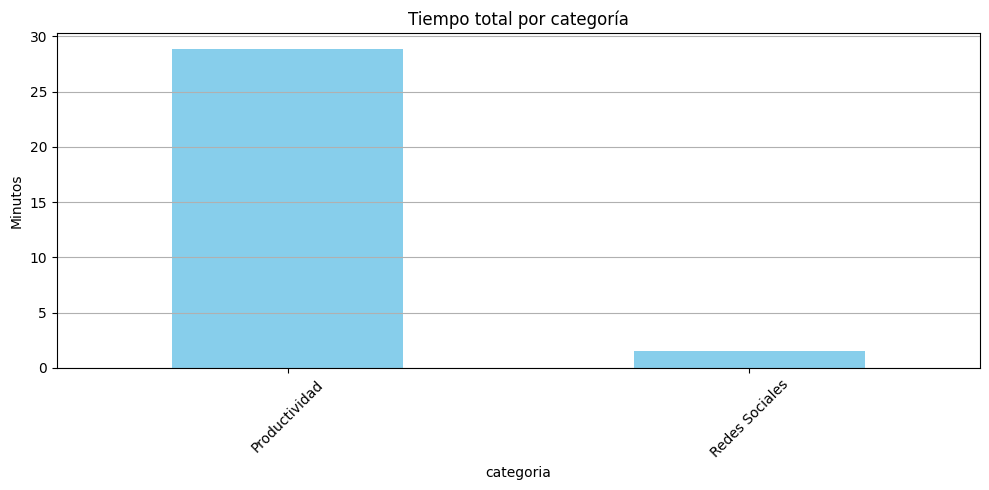

In [6]:
categoria_agrupada = df.groupby('categoria')['tiempo_minutos'].sum().sort_values(ascending=False)
categoria_agrupada.plot(kind='bar', title='Tiempo total por categoría', figsize=(10,5), color='skyblue')
plt.ylabel("Minutos")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Análisis por hora del día

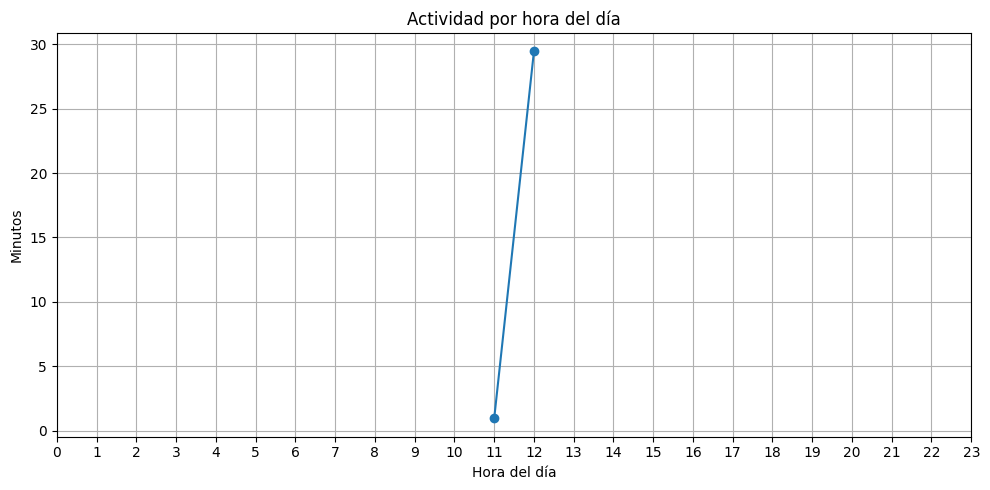

In [7]:
# Convertimos la hora de string a entero (solo hora sin minutos)
df['hora_num'] = pd.to_datetime(df['hora'], format='%H:%M').dt.hour
hora_agrupada = df.groupby('hora_num')['tiempo_minutos'].sum()
hora_agrupada.plot(kind='line', title='Actividad por hora del día', marker='o', figsize=(10,5))
plt.xlabel("Hora del día")
plt.ylabel("Minutos")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


## Días más activos

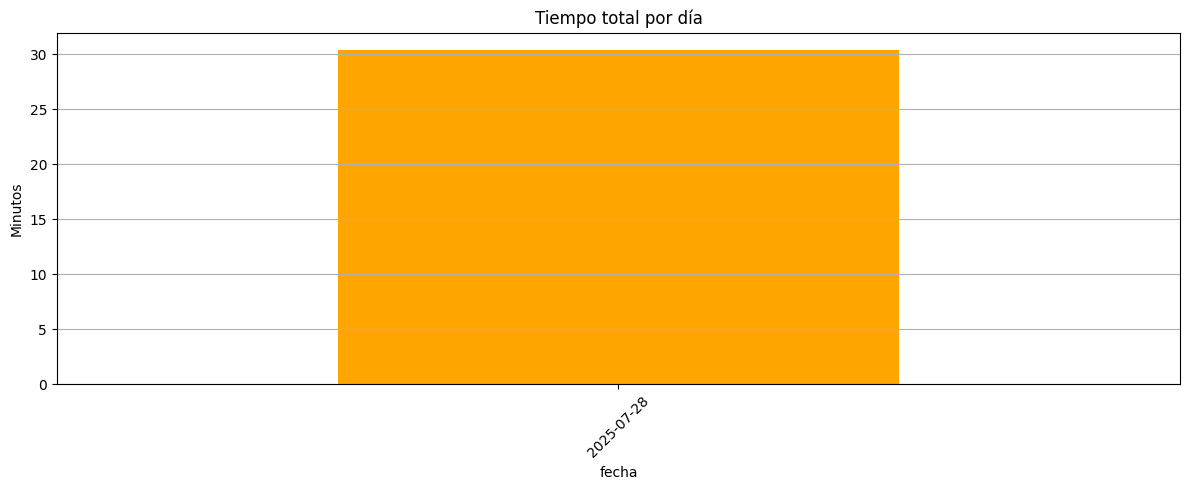

In [8]:
df['fecha'] = pd.to_datetime(df['fecha'])
fecha_agrupada = df.groupby(df['fecha'].dt.date)['tiempo_minutos'].sum()
fecha_agrupada.plot(kind='bar', title='Tiempo total por día', figsize=(12,5), color='orange')
plt.ylabel("Minutos")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##  Observaciones y próximos pasos


- ¿A qué hora es más activo el usuario?
- ¿Qué categoría domina su día?
- ¿Hay días en los que no hay datos?
- Este análisis será la base para notificaciones inteligentes y entrenar IA futura.
